<a href="https://colab.research.google.com/github/purosh96/Image_recognition_and_Computer_vision/blob/main/MNIST_Keras_Best_withoutCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.7.0'

Load Data

In [17]:
mnist = keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [18]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [19]:
X_train = X_train/255.0
X_test = X_test/255.0
y_train = y_train.reshape(60000,1)
y_test =y_test.reshape(10000,1)

In [20]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000, 1), (10000, 28, 28), (10000, 1))

Visualize

[9]


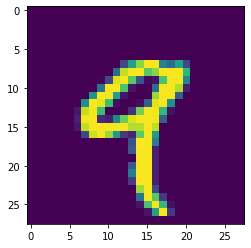

In [28]:
i = 4
plt.imshow(X_train[i])
print(y_train[i])

Model

In [31]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(units=128,activation="relu"))
model.add(keras.layers.Dense(units=64,activation="relu"))
model.add(keras.layers.Dense(units=32,activation="relu"))
model.add(keras.layers.Dense(units=10,activation="softmax"))

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(optimizer="adam",loss = "sparse_categorical_crossentropy",metrics=["accuracy"])

In [34]:
model.fit(x=X_train,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2481 - accuracy: 0.9262
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1054 - accuracy: 0.9682
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0577 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0468 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9888
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9905
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0255 - accuracy: 0.9917
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.021

In [35]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1097 - accuracy: 0.9734


[0.10971247404813766, 0.9733999967575073]

In [39]:
temp = X_test[0]
temp = temp.reshape(1,28,28)
result = model.predict(temp)

In [41]:
result.argmax()

7

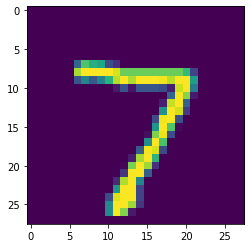

In [42]:
plt.imshow(X_test[0])